
# **1. Installation**

In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 4.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-06-14 03:42:52--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3036::ac43:b421, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.1s    

2022-06-14 03:42:52 (12.6 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   cr

Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# **2. Run Mask-RCNN on Images**


# **IMPORT THƯ VIỆN& KẾT NỐI GOOGLE DRIVE**

In [ ]:
import pickle 
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


#  HÀM TÍNH HISTOGRAM

In [ ]:
def TinhHist(pathfilename):
  img = cv.imread(pathfilename,0)
  hist = cv.calcHist([img],[0],None,[256],[0,256])
  size = img.shape[0]*img.shape[1]
  hist = hist / size
  return hist   

#  HÀM DRAW_MASK

In [ ]:
from PIL import Image
def draw_mask(img,img_2, pts, color, alpha=1):
    h, w, _ = img.shape
    overlay = img_2.copy()
    output = img.copy()
    cv2.fillPoly(overlay, pts, color)
    output = cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0)
    return output

# CHI TIẾT ÁP DỤNG MASK_RCNN CHO 1 ẢNH

### **UPLOAD ẢNH**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1.jpg to 1.jpg


In [ ]:
name = uploaded.keys()
filename = next(iter(uploaded))
filename

'1.jpg'

### **CHO ẢNH THUỘC CLASS NÀO ĐỂ SUY RA MODEL**

In [ ]:
img = cv.imread(filename)
#choose class
choices=input()
list_i=['female','male','unisex']
list_j=['top','bottom','dress','bag&backpack','hat','shoes']
for i in range(len(list_i)):
  for j in range(len(list_j)):
    if int(choices)==(i+1)*10+(j+1)*1:
      predict=list_i[i]+'_'+list_j[j]

35


In [ ]:
img.shape
path_img2='/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Dataset/background.jpg'
img_2=cv.imread(path_img2)
width = int(img.shape[1] * 100 / 100)
height = int(img.shape[0] * 100 / 100)
dim = (width, height)
  
# resize image
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)


In [ ]:
if 'hat' in predict:
  model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_hat.h5'
if 'top' in predict:
  model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_top.h5'
if 'bottom' in predict:
  model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_bottom.h5'
if 'dress' in predict:
  model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_dress.h5'
if 'shoes' in predict:
  model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_shoes.h5'
if 'bag&backpack' in predict:
  model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_bag&backpack.h5'


### **LOAD WEIGHTS**

In [ ]:
test_model, inference_config = load_inference_model(1,model)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_hat.h5


### **SHOW ẢNH KHI CÓ MASK**

### **TẠO RA MASK**

In [ ]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

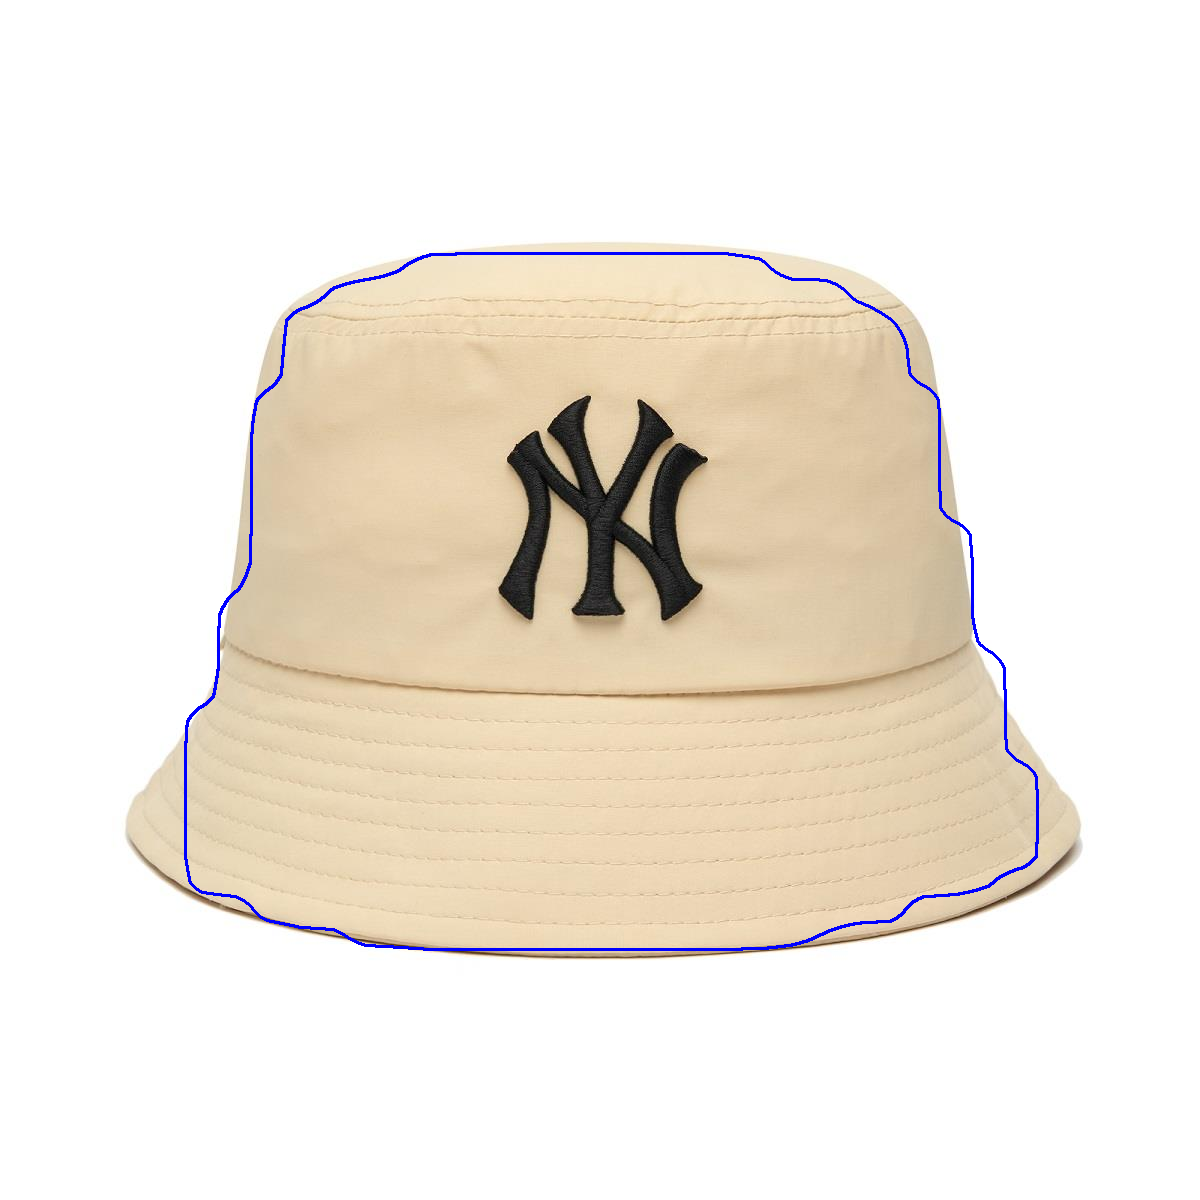

In [ ]:
# Load Image
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    #print(contours[0])
    for cnt in contours:
        cv2.polylines(img, [cnt], True, (255,0,0), 2)
        img_1 = draw_mask(img,img_2, [cnt], color=(255,0,0))
#net = cv2.dnn.readNetFromTensorflow(weightsPath, configPath)
cv2_imshow(img)


In [ ]:
cv.imwrite('mask.jpg', img_1)


True

### **COMPOSITE ẢNH GỐC VÀ ẢNH NỀN TRẮNG VỚI MASK LÀ ẢNH VỪA TẠO**

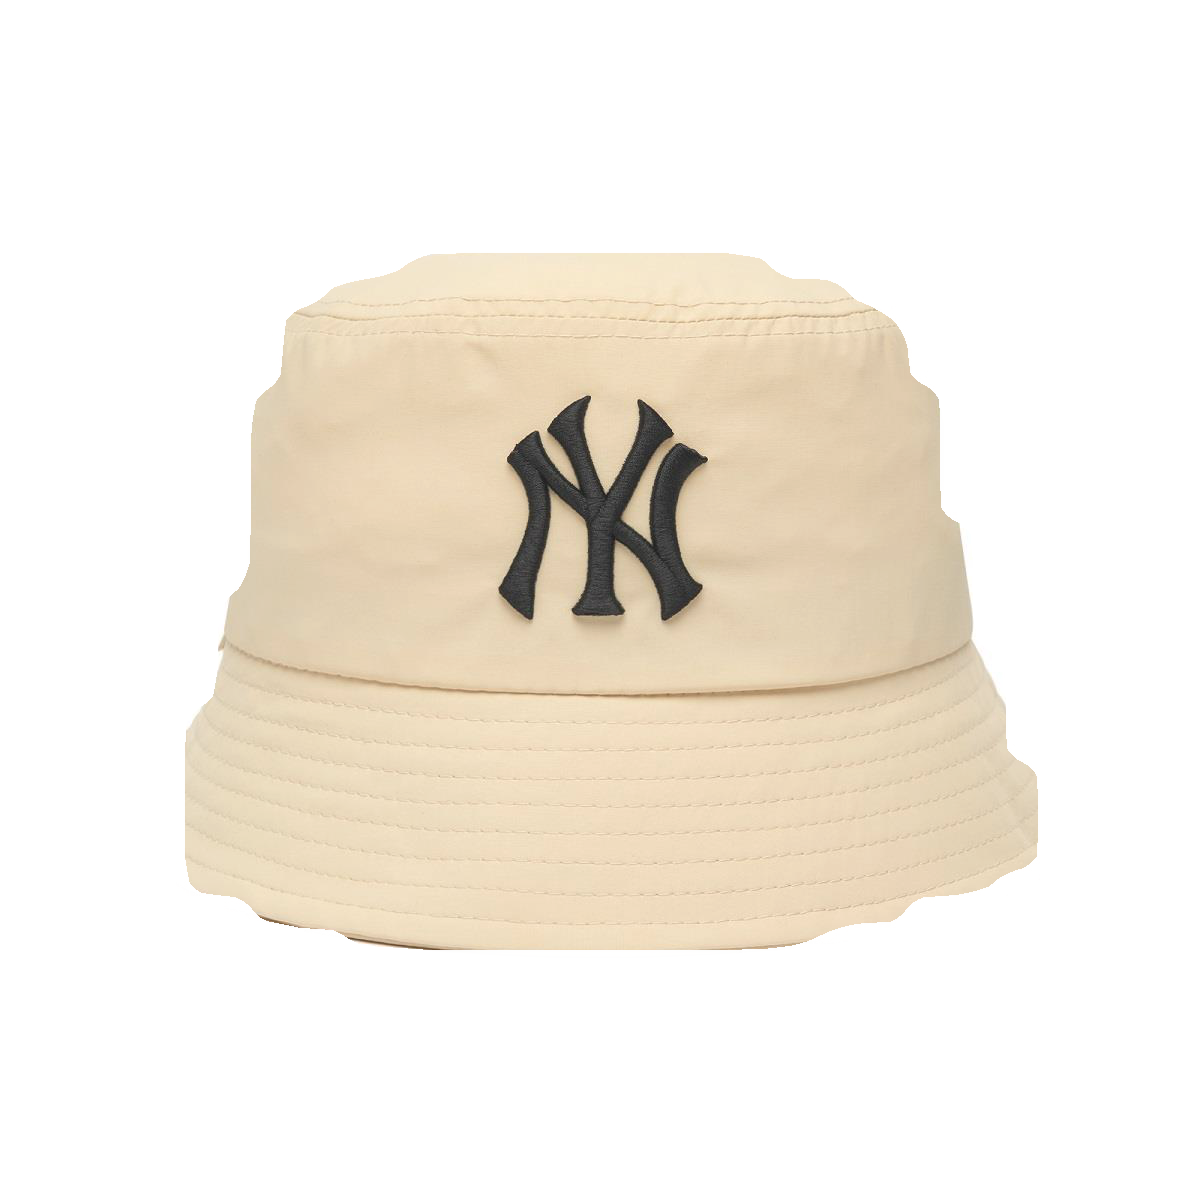

In [ ]:
from PIL import Image, ImageDraw, ImageFilter
path_img1=filename
im1 = Image.open(path_img1)
im2 = Image.open(path_img2).resize(im1.size)
mask =Image.open('/content/mask.jpg').convert('L').resize(im1.size)
im = Image.composite(im2, im1, mask)
im

In [ ]:
im.save("img.jpg")

In [ ]:
img_after=cv.imread('/content/img.jpg')

### CROP ẢNH 

In [ ]:
# Find x,y,w,h of bounding box
array=np.argmax(contours[0], axis=0)
indice_X_max,indice_Y_max=array[0],array[1]
array=np.argmin(contours[0], axis=0)
indice_X_min,indice_Y_min=array[0],array[1]
#print(contours[0][indice_X_max][0],contours[0][indice_Y_max][1])
#print(contours[0][indice_X_min][0],contours[0][indice_Y_min][1])
X_max,Y_max,X_min,Y_min=(contours[0][indice_X_max][0],
                         contours[0][indice_Y_max][1],
                         contours[0][indice_X_min][0],
                         contours[0][indice_Y_min][1])
w=X_max-X_min
h=Y_max-Y_min
x,y=X_min,Y_min
#print(w,h,X_min,Y_min)

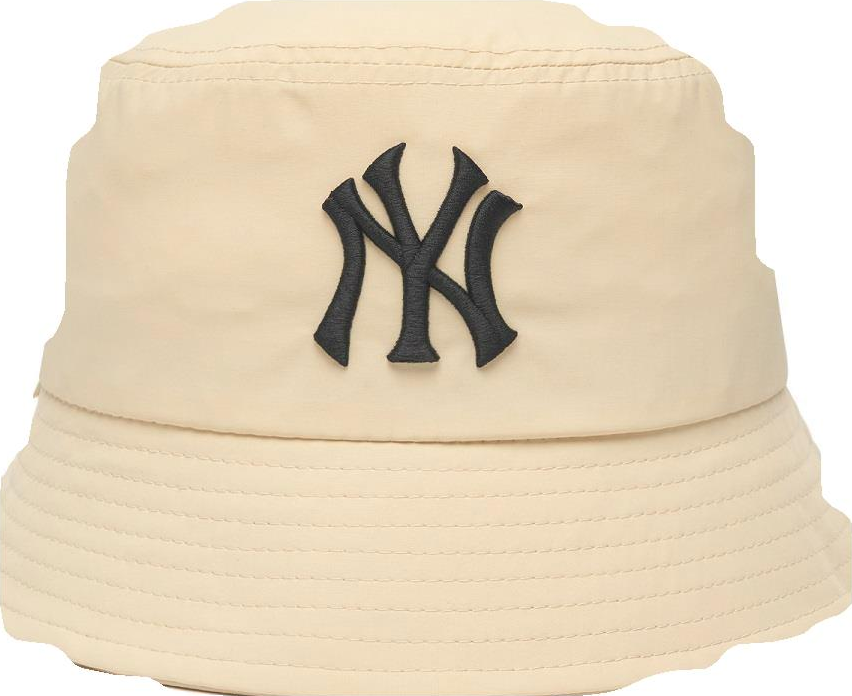

In [ ]:
img_crop = img_after[y:y+h, x:x+w, :]
cv2_imshow(img_crop)

# ÁP DỤNG MASK_RCNN CHO 1 ẢNH NHANH

In [ ]:
def app_maskrcnn_1_img(path):
  filename = path
  path_img2='/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Dataset/background.jpg'
  img_2=cv.imread(path_img2)
  img = cv.imread(filename)
  width = int(img.shape[1] * 100 / 100)
  height = int(img.shape[0] * 100 / 100)
  dim = (width, height)
  
  # resize image
  img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)
  img = cv.imread(filename)
  #choose class
  choices=input()
  list_i=['female','male','unisex']
  list_j=['top','bottom','dress','bag&backpack','hat','shoes']
  for i in range(len(list_i)):
    for j in range(len(list_j)):
      if int(choices)==(i+1)*10+(j+1)*1:
        predict=list_i[i]+'_'+list_j[j]
  if 'hat' in predict:
    model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_hat.h5'
  if 'top' in predict:
    model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_top.h5'
  if 'bottom' in predict:
    model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_bottom.h5'
  if 'dress' in predict:
    model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_dress.h5'
  if 'shoes' in predict:
    model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_shoes.h5'
  if 'bag&backpack' in predict:
    model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_bag&backpack.h5'
  test_model, inference_config = load_inference_model(1,model)
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Detect results
  r = test_model.detect([image])[0]
  colors = random_colors(80)
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Detect results
  r = test_model.detect([image])[0]
  colors = random_colors(80)
  # Load Image
  # Get Coordinates and show it on the image
  object_count = len(r["class_ids"])
  for i in range(object_count):
      # 1. Mask
    mask = r["masks"][:, :, i]
      
    contours = get_mask_contours(mask)
    #  print(contours)
    for cnt in contours:
      cv2.polylines(img_2, [cnt], True, (0,0,0), 9)
      img_1 = draw_mask(img,img_2, [cnt], color=(0,0,0))
    #cv2_imshow(img_1)
    cv.imwrite('mask.jpg', img_1)
  from PIL import Image, ImageDraw, ImageFilter
  path_img1=filename
  im1 = Image.open(path_img1)
  im2 = Image.open(path_img2).resize(im1.size)
  mask =Image.open('/content/mask.jpg').convert('L').resize(im1.size)
  im = Image.composite(im2, im1, mask)
  im.save("img.jpg")
  img_after=cv.imread('/content/img.jpg')
  # Find x,y,w,h of bounding box
  array=np.argmax(contours[0], axis=0)
  indice_X_max,indice_Y_max=array[0],array[1]
  array=np.argmin(contours[0], axis=0)
  indice_X_min,indice_Y_min=array[0],array[1]
  #print(contours[0][indice_X_max][0],contours[0][indice_Y_max][1])
  #print(contours[0][indice_X_min][0],contours[0][indice_Y_min][1])
  X_max,Y_max,X_min,Y_min=(contours[0][indice_X_max][0],
                         contours[0][indice_Y_max][1],
                         contours[0][indice_X_min][0],
                         contours[0][indice_Y_min][1])
  w=X_max-X_min
  h=Y_max-Y_min
  x,y=X_min,Y_min
  #print(w,h,X_min,Y_min)
  img_crop = img_after[y:y+h, x:x+w, :]
  cv2_imshow(img_crop)
  return img_crop

Saving 1.jpg to 1 (3).jpg
34
Loading weights from  /gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_bag&backpack.h5


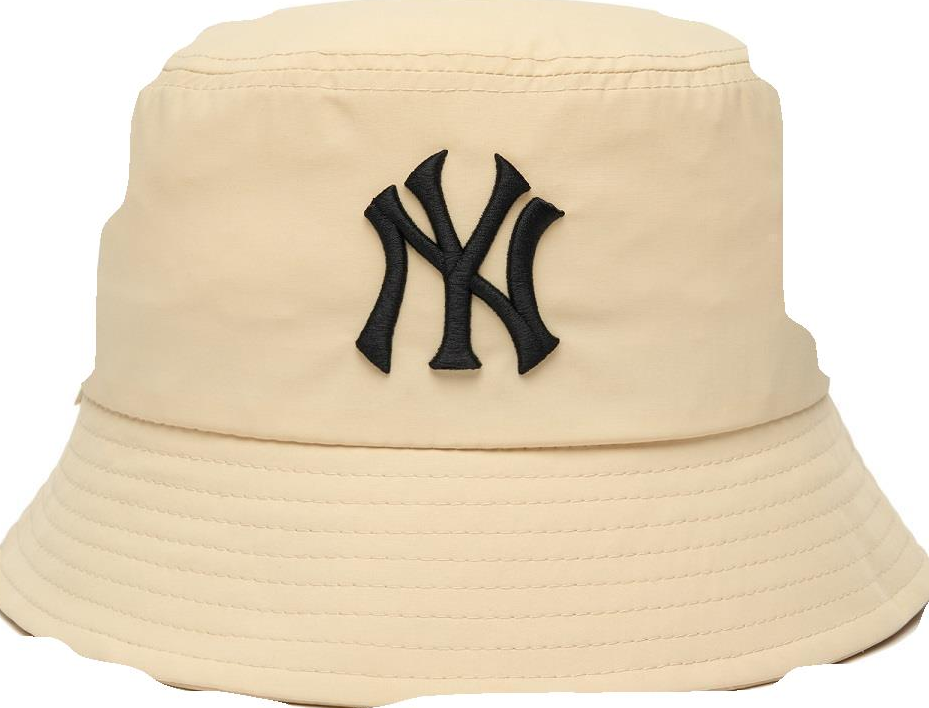

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
from google.colab import files
uploaded = files.upload()
name = uploaded.keys()
filename = next(iter(uploaded))
im = Image.open(filename)
rgb_im = im.convert('RGB')
rgb_im.save(filename)
app_maskrcnn_1_img(filename)

# ÁP DỤNG MASK_RCNN CHO THƯ MỤC ẢNH







In [ ]:
def app_maskrcnn(path,i):
  filename = path
  path_img2='/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Dataset/background.jpg'
  img_2=cv.imread(path_img2)
  img = cv.imread(filename)
  width = int(img.shape[1] * 100 / 100)
  height = int(img.shape[0] * 100 / 100)
  dim = (width, height)
  
  # resize image
  img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)
  model= '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Model/mask_rcnn_object_'+i+'.h5'
  test_model, inference_config = load_inference_model(1,model)
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Detect results
  r = test_model.detect([image])[0]
  colors = random_colors(80)
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Detect results
  r = test_model.detect([image])[0]
  colors = random_colors(80)
  # Load Image
  # Get Coordinates and show it on the image
  object_count = len(r["class_ids"])
  for i in range(object_count):
      # 1. Mask
    mask = r["masks"][:, :, i]
      
    contours = get_mask_contours(mask)
    #  print(contours)
    for cnt in contours:
      cv2.polylines(img_2, [cnt], True, (0,0,0), 9)
      img_1 = draw_mask(img,img_2, [cnt], color=(0,0,0))
    #cv2_imshow(img_1)
    cv.imwrite('mask.jpg', img_1)
  from PIL import Image, ImageDraw, ImageFilter
  path_img1=filename
  im1 = Image.open(path_img1)
  im2 = Image.open(path_img2).resize(im1.size)
  mask =Image.open('/content/mask.jpg').convert('L').resize(im1.size)
  im = Image.composite(im2, im1, mask)
  im.save("img.jpg")
  img_after=cv.imread('/content/img.jpg')
  # Find x,y,w,h of bounding box
  array=np.argmax(contours[0], axis=0)
  indice_X_max,indice_Y_max=array[0],array[1]
  array=np.argmin(contours[0], axis=0)
  indice_X_min,indice_Y_min=array[0],array[1]
  #print(contours[0][indice_X_max][0],contours[0][indice_Y_max][1])
  #print(contours[0][indice_X_min][0],contours[0][indice_Y_min][1])
  X_max,Y_max,X_min,Y_min=(contours[0][indice_X_max][0],
                         contours[0][indice_Y_max][1],
                         contours[0][indice_X_min][0],
                         contours[0][indice_Y_min][1])
  w=X_max-X_min
  h=Y_max-Y_min
  x,y=X_min,Y_min
  #print(w,h,X_min,Y_min)
  img_crop = img_after[y:y+h, x:x+w, :]
  cv2_imshow(img_crop)
  return img_crop

In [ ]:
def app_maskrcnn_file_female(path_to_files):
  list_imgs_female=[]
  list_labels_female=[]
  for file_name in os.listdir(path_to_files):
        type=['female','male','unisex']
        for j in type:
            path_1=os.path.join(path_to_files, j)
            if j=='female':
                list=['top','bottom','bag&backpack','dress','shoes','hat']
                for i in list:
                    path_2=os.path.join(path_1, i)
                    for file_name in os.listdir(path_2):
                        im=app_maskrcnn(os.path.join(path_2, file_name),i)                   
                        list_imgs_female.append(im)
                        list_labels_female.append(j+'_'+i)        

In [ ]:
def app_maskrcnn_file_male(path_to_files):
  list_imgs_male=[]
  list_labels_male=[]
  for file_name in os.listdir(path_to_files):
        type=['female','male','unisex']
        for j in type:
            path_1=os.path.join(path_to_files, j)
            if j=='male':
                list=['top','bottom','bag&backpack','shoes','hat']
                for i in list:
                    path_2=os.path.join(path_1, i)
                    for file_name in os.listdir(path_2):
                        im=app_maskrcnn(os.path.join(path_2, file_name),i)                   
                        list_imgs_male.append(im)
                        list_labels_male.append(j+'_'+i)

In [ ]:
def app_maskrcnn_file_unisex(path_to_files):
  list_imgs_unisex=[]
  list_labels_unisex=[]
  for file_name in os.listdir(path_to_files):
        type=['female','male','unisex']
        for j in type:
            path_1=os.path.join(path_to_files, j)
            if j=='unisex':
                list=['bottom','bag&backpack','shoes','hat']
                for i in list:
                    path_2=os.path.join(path_1, i)
                    for file_name in os.listdir(path_2):
                        im=app_maskrcnn(os.path.join(path_2, file_name),i)                   
                        list_imgs_unisex.append(im)
                        list_labels_unisex.append(j+'_'+i)

In [ ]:
choices=input()
if (choices=="1"):
  app_maskrcnn_file_female( '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Dataset/Fashion Product Image Dataset/images đã phân theo từng loại')


In [ ]:
choices=input()
if (choices=="1"):
  app_maskrcnn_file_unisex( '/gdrive/MyDrive/Đồ án Nhập môn Thị giác máy tính (CS231.M22.KHCL)/Dataset/Fashion Product Image Dataset/images đã phân theo từng loại')


In [ ]:
import shutil
shutil.copy("/content/mask.jpg",'/gdrive/MyDrive')

'/gdrive/MyDrive/mask.jpg'